In [1]:
#📦 Imports & Setup

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#📘 Define DC Functions (Fundamental)

# This Juypter notebook models production using Arps equations of Exponential, Harmonic and Hyperbolic Decline types

def exponential_decline (qi, D, t):
    return qi * np.exp(-D * t)

def harmonic_decline (qi, D, t):
    return qi / (1 + D * t)

def hyperbolic_decline (qi, D, b, t):
    return qi / np.power (1 + b * D * t, 1 /b)

def calculate_EUR (model, qi, D, b = None, t_end = 120):
    t = np.arange (0, t_end + 1)
    if model == "exponential":
        q = exponential_decline (qi, D, t)
    elif model == "harmonic":
        q = harmonic_decline (qi, D, t)
    elif model == "hyperbolic":
        q = hyperbolic_decline (qi, D ,b, t)
    EUR = np.trapz (q, t)
    return t, q, EUR


In [ ]:
#🧪 Execute the Function

qi = 1000       # initial rate (stb/day)
D = 0.15        # niminal decline rate (dimensionless)
b = 0.7         # hyperbolic exponent
t_end = 120     # forecast time (months)

t_exp, q_exp, EUR_exp = calculate_EUR ("exponential", qi, D, t_end = t_end)
t_har, q_har, EUR_har = calculate_EUR ("harmonic", qi, D, t_end = t_end)
t_hyp, q_hyp, EUR_hyp = calculate_EUR ("hyperbolic", qi, D, b = b, t_end = t_end)

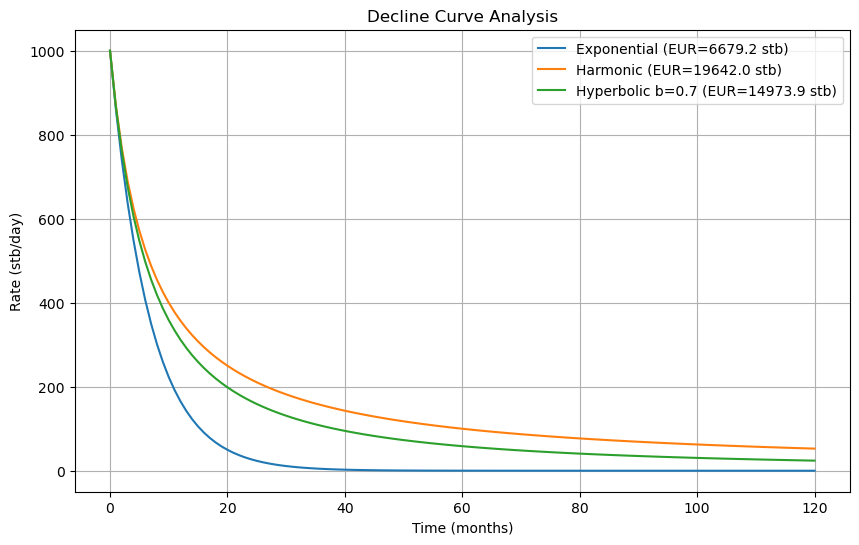

In [5]:
#📊 Plot the Results

plt.figure (figsize = (10,6))
plt.plot (t_exp, q_exp, label = f"Exponential (EUR={EUR_exp:.1f} stb)")
plt.plot (t_har, q_har, label = f"Harmonic (EUR={EUR_har:.1f} stb)")
plt.plot (t_hyp, q_hyp, label = f"Hyperbolic b={b} (EUR={EUR_hyp:.1f} stb)")
plt.xlabel ("Time (months)"), plt.ylabel ("Rate (stb/day)")
plt.title ("Decline Curve Analysis")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
#📥 Export to CSV

df = pd.DataFrame({
    "Time (months)": t_exp,
    "Exponential": q_exp,
    "Harmonic": q_har,
    "Hyperbolic":q_hyp
})
df.to_csv("decline_curve_estimate.csv", index = False)

In [7]:
#🔧 Summary

print(f"Exponential EUR: {EUR_exp:.1f} stb")
print(f"Harmonic EUR: {EUR_har:.1f} stb")
print(f"Hyperbolic EUR: {EUR_hyp:.1f} stb")

Exponential EUR: 6679.2 stb
Harmonic EUR: 19642.0 stb
Hyperbolic EUR: 14973.9 stb
